In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/CS406.N11.KHCL/Baitap/Baitap3/images

/content/drive/.shortcut-targets-by-id/1Dud2CQv6t7m_V1thbeNZKmRdRm_iaM_z/CS406.N11.KHCL/Baitap/Baitap3/images


In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import matplotlib as mpl

In [6]:
!ls

51A13883.jpg  Bansoxe01.jpg  Bansoxe03.jpg  j.png     vantay.jpg
art8.jpg      Bansoxe02.jpg  coins.png	    rice.png


#Yêu cầu 1

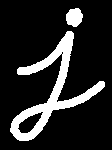

In [11]:
img = cv2.imread('j.png')
cv2_imshow(img)

In [12]:
kernel = np.ones((5, 5), np.uint8)

In [36]:
img_erosion = cv2.erode(img, kernel, iterations=1)
img_dilation = cv2.dilate(img, kernel, iterations=1)
img_opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
img_closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

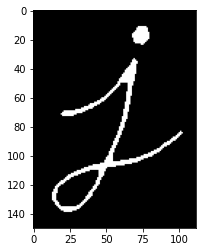

In [35]:
plt.imshow(img_erosion)
plt.show()

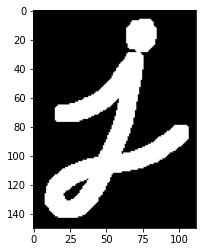

In [37]:
plt.imshow(img_dilation)
plt.show()

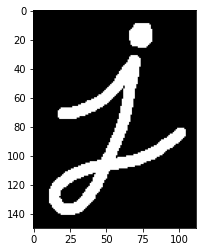

In [38]:
plt.imshow(img_opening)
plt.show()

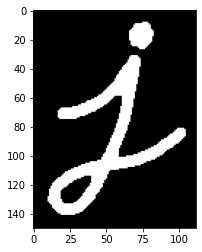

In [39]:
plt.imshow(img_closing)
plt.show()

#Yêu cầu 2

In [22]:
!ls

51A13883.jpg  Bansoxe01.jpg  Bansoxe03.jpg  j.png     vantay.jpg
art8.jpg      Bansoxe02.jpg  coins.png	    rice.png


In [47]:
vantay = cv2.imread('vantay.jpg')
rice = cv2.imread('rice.png')
coins = cv2.imread('coins.png')

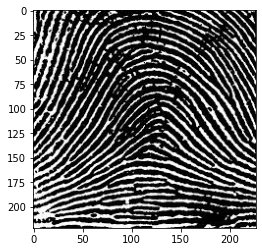

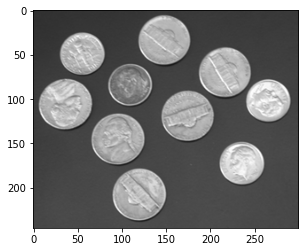

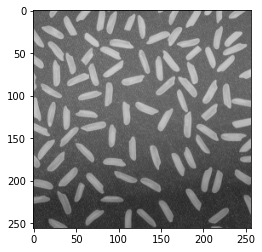

In [48]:
for i in [vantay, coins, rice]:
  plt.imshow(i)
  plt.show()

In [62]:
def yc2(img, img_yc2):
  fig, ((ax1, ax2)) = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10,10))

  ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  ax1.title.set_text("original")

  ax2.imshow(cv2.cvtColor(img_yc2, cv2.COLOR_BGR2RGB))
  ax2.title.set_text("Transformed")

##Vân tay

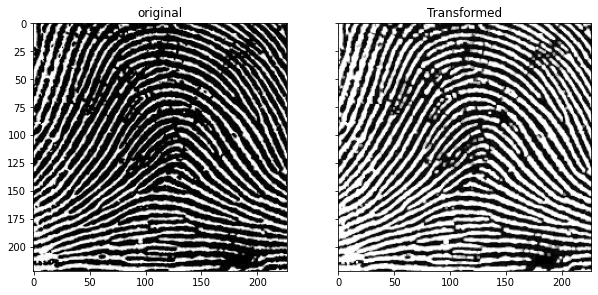

In [63]:
vantay_yc2 = cv2.dilate(vantay, np.ones((2,2), np.uint8), iterations=1)
yc2(vantay, vantay_yc2)

##Coins

In [56]:
new_coins = cv2.cvtColor(coins, cv2.COLOR_BGR2GRAY)

In [58]:
yc2_coins = cv2.threshold(new_coins, 100, 255,cv2.THRESH_BINARY)[1]
dilation_coins = cv2.dilate(yc2_coins, np.ones((3, 3), np.uint8), iterations=1)

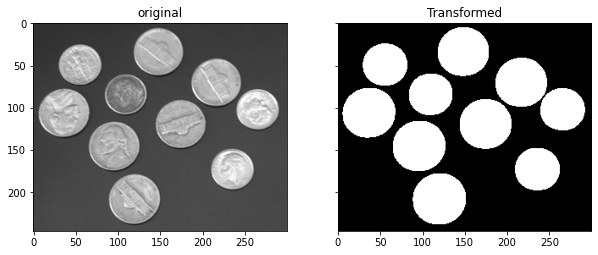

In [64]:
yc2(coins, dilation_coins)

##Rice

In [60]:
new_rice = cv2.cvtColor(rice, cv2.COLOR_BGR2GRAY)

In [61]:
yc2_rice = cv2.threshold(new_rice, 115, 255,cv2.THRESH_BINARY)[1]
opening_rice = cv2.morphologyEx(yc2_rice, cv2.MORPH_OPEN, np.ones((3, 3), np.uint8))

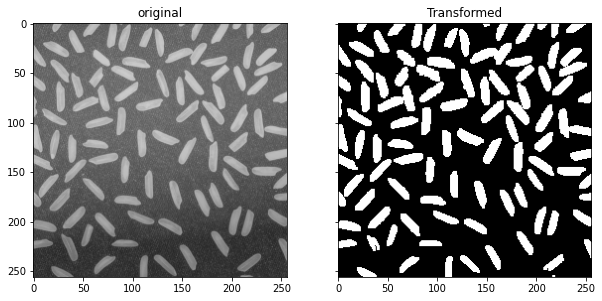

In [65]:
yc2(rice, opening_rice)

#Yêu cầu 3

In [66]:
!ls

51A13883.jpg  Bansoxe01.jpg  Bansoxe03.jpg  j.png     vantay.jpg
art8.jpg      Bansoxe02.jpg  coins.png	    rice.png


In [67]:
art = cv2.imread('art8.jpg')

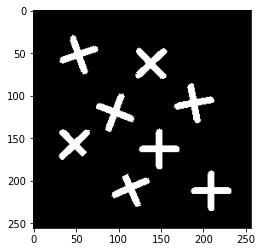

In [68]:
plt.imshow(art)
plt.show()

In [71]:
art8 = cv2.cvtColor(art, cv2.COLOR_BGR2GRAY)

In [72]:
art8_threshold = cv2.threshold(art8, 127, 255, cv2.THRESH_BINARY)[1]

In [74]:
num_labels, labels = cv2.connectedComponents(art8_threshold)
    
label_hue = np.uint8(179*labels/np.max(labels))
blank_ch = 255*np.ones_like(label_hue)
labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])
   
labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)

labeled_img[label_hue==0] = 0

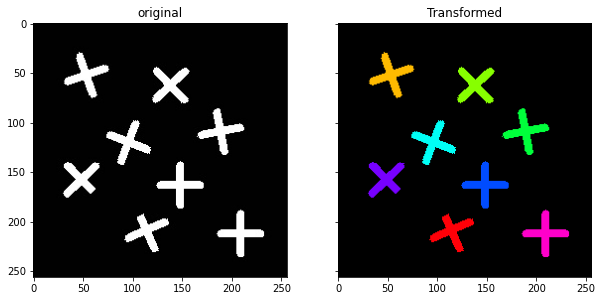

In [75]:
fig, ((ax1, ax2)) = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10,10))

ax1.imshow(cv2.cvtColor(art8, cv2.COLOR_BGR2RGB))
ax1.title.set_text("original")

ax2.imshow(cv2.cvtColor(labeled_img, cv2.COLOR_BGR2RGB))
ax2.title.set_text("Transformed")

#Yêu cầu 4

In [76]:
!ls

51A13883.jpg  Bansoxe01.jpg  Bansoxe03.jpg  j.png     vantay.jpg
art8.jpg      Bansoxe02.jpg  coins.png	    rice.png


In [101]:
so = cv2.imread('Bansoxe03.jpg')

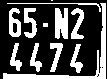

In [102]:
gray = cv2.cvtColor(so, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 190, 255,cv2.THRESH_BINARY_INV)[1]
cv2_imshow(thresh)

In [103]:
output = cv2.connectedComponentsWithStats(thresh, 4, cv2.CV_32S)
(numLabels, labels, stats, centroids) = output

In [104]:
mask = np.zeros(gray.shape, dtype="uint8")

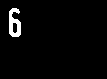

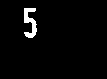

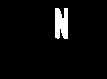

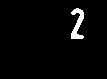

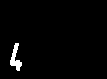

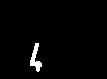

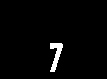

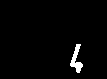

In [118]:
for i in range(0, numLabels):
    x = stats[i, cv2.CC_STAT_LEFT]
    y = stats[i, cv2.CC_STAT_TOP]
    w = stats[i, cv2.CC_STAT_WIDTH]
    h = stats[i, cv2.CC_STAT_HEIGHT]
    area = stats[i, cv2.CC_STAT_AREA]
    (cX, cY) = centroids[i]

    if w< 5 or h <5 or w > 20:
      continue

    output = so.copy()
    cv2.rectangle(output, (x, y), (x + w, y + h), (0, 255, 0), 3)
    cv2.circle(output, (int(cX), int(cY)), 4, (0, 0, 255), -1)
    componentMask = (labels == i).astype("uint8") * 255
    cv2_imshow(componentMask)